In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from scipy.integrate import solve_ivp
import os

In [77]:
x0 = ((np.random.rand(1, 2)[0])-0.5)

# Converting to initial conditions to polar coordinates for slow flow
z1 = x0[0] - x0[1]*1j
print(np.abs(z1), np.rad2deg(np.angle(z1)))

r_phi0 = [np.abs(z1), np.angle(z1)]

print("compare initial conditions")
print(f"[{x0[0]}, {x0[1]}]")
print(f"[{r_phi0[0]*np.cos(r_phi0[1])}, {-r_phi0[0]*np.sin(r_phi0[1])}")

0.23935449190908153 -133.32201693559577
compare initial conditions
[-0.16422062911364244, 0.17413258675668397]
[-0.1642206291136424, 0.17413258675668397


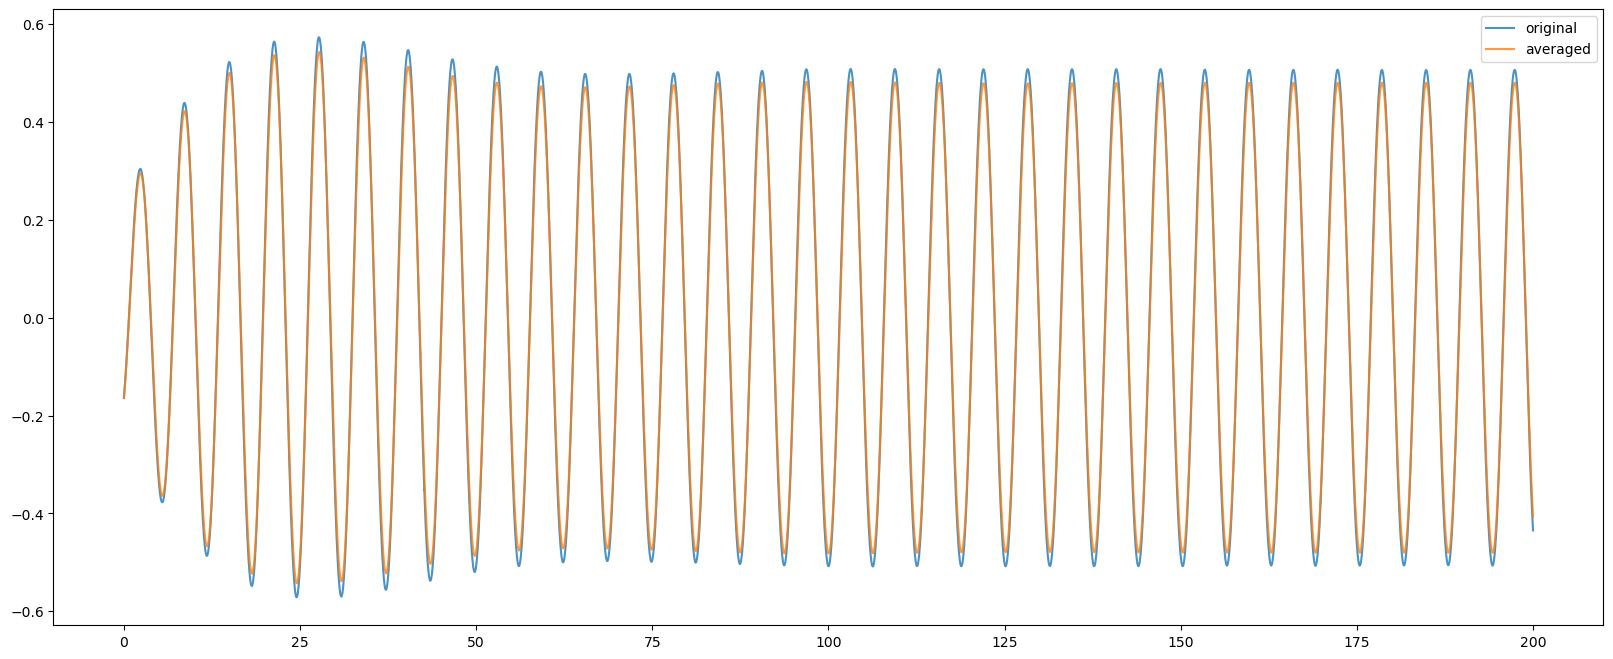

In [91]:


EPSILON = 0.1
GAMMA = 0.1
w0 = 0.9
w = 1
f0 = 1



t_start = 0
t_stop = 200
DURATION = t_stop
SAMPLE_RATE = 1000
SAMPLES = int(DURATION*SAMPLE_RATE)
t = np.linspace(t_start, t_stop, SAMPLE_RATE*DURATION)

# numerical integration of original system
def duffing_deriv(t, X, gamma, eps, w0, w, f0):
    x, y = X
    return [y, -gamma*y - w0**2*x - eps*x**3 + eps*f0*np.cos(w*t)]

sol = solve_ivp(duffing_deriv,
                        [t_start, t_stop],
                        x0,
                        args=[GAMMA, EPSILON, w0, w, f0],
                        method="LSODA",
                        dense_output=True,
                        t_eval=t)
x_ori, y_ori = sol.y


# numerical integration of averaged system
def av_duffing_deriv(t, X, gamma, eps, w0, w, f0):
    r, phi = X
    return [-gamma*r/2 - eps*f0/(2*w)*np.sin(phi), -(w-w0) + 3*eps/(2*w)*(r/2)**2 - eps*f0/(2*w*r)*np.cos(phi)]

sol = solve_ivp(av_duffing_deriv,
                        [t_start, t_stop],
                        r_phi0,
                        args=[GAMMA, EPSILON, w0, w, f0],
                        method="LSODA",
                        dense_output=True,
                        t_eval=t)
r, phi = sol.y

# reconstructing the 'fast flow' variable
x_av  = r*np.cos(t + phi)



plt.figure(figsize=(20, 8))
plt.plot(t, x_ori, alpha=0.8, label="original")
plt.plot(t, x_av, alpha=0.8, label="averaged")
plt.legend()
plt.show()